In [1]:
%pylab inline
import pandas as pd
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('~/Projects/UberTripDataAnalysis/data/uber-raw-data-apr14.csv')

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# create extra columns

In [7]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [8]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [15]:
def get_dom(dt):
    return dt.day

data['Date of Month'] = data['Date/Time'].map(get_dom)

In [11]:
def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

data['Week Day'] = data['Date/Time'].map(get_weekday)
data['Hour'] = data['Date/Time'].map(get_hour)

# some analysis

Text(0.5,1,'Frequency by DoM -Uber - Apr 2014')

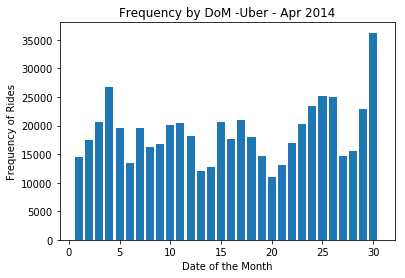

In [27]:
hist(data['Date of Month'], bins=30, width=.8, range=(0.6,30.6));
xlabel('Date of the Month')
ylabel('Frequency of Rides')
title('Frequency by DoM -Uber - Apr 2014')

In [32]:
#for k, rows in data.groupby('Date of Month'):
#    print((k,len(rows)))

def count_rows(rows):
    return len(rows)

by_date = data.groupby('Date of Month').apply(count_rows)
by_date

Date of Month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [33]:
by_date_sorted = by_date.sort_values()
by_date_sorted

Date of Month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

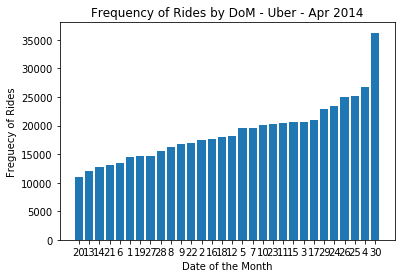

In [42]:
bar(range(1,31), by_date_sorted )
xticks(range(1,31),by_date_sorted.index);
xlabel('Date of the Month')
ylabel('Freguecy of Rides')
title('Frequency of Rides by DoM - Uber - Apr 2014');